In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap
import numpy as np

data = pd.read_csv("../../data/data_export.csv")

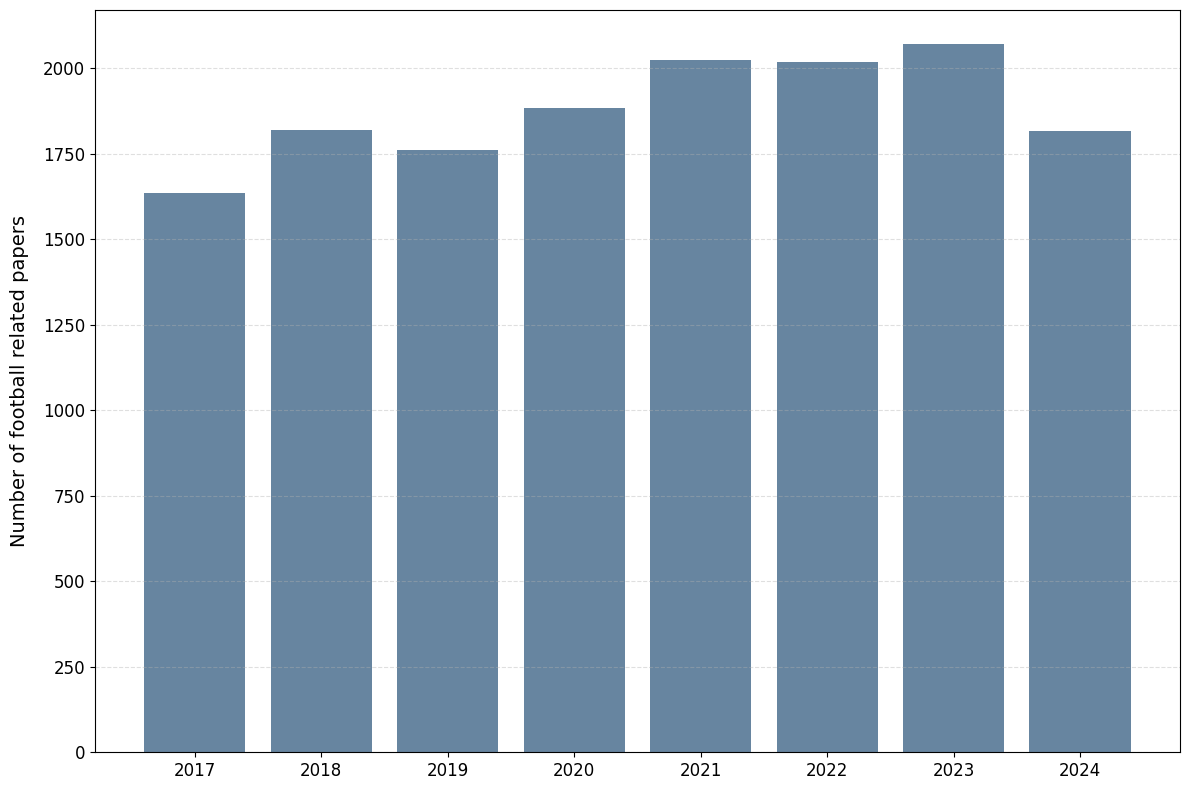

In [ ]:
yearly_distribution = data['publication_year'].value_counts().sort_index()

plt.figure(figsize=(12, 8))
plt.bar(yearly_distribution.index, yearly_distribution.values, color='#416788', alpha=0.8)

plt.ylabel('Number of football related papers', fontsize=14, labelpad=10)

plt.ylim(0, max(yearly_distribution.values) + 100)

plt.xticks(yearly_distribution.index, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.4)

plt.tight_layout()
# plt.savefig("paper_distribution.png", dpi=400)
plt.show()

/var/folders/66/n03tnlzs0fd6bhjtzdb8ztwm0000gn/T/ipykernel_3431/379576614.py:11: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = get_cmap('tab10')


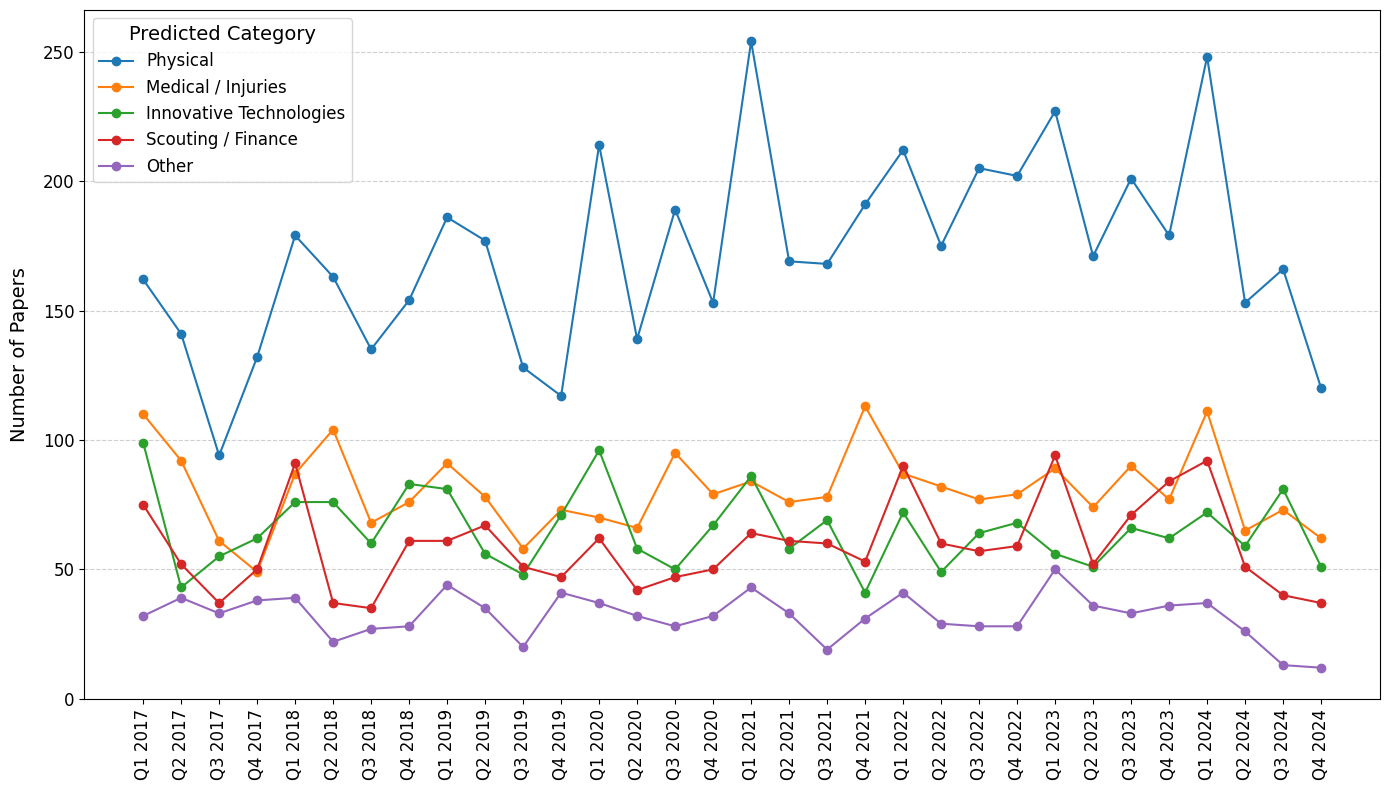

In [ ]:
data['predicted_category'] = data['predicted_category'].replace('Physical Attributes', 'Physical')
data['publication_date'] = pd.to_datetime(data.get('publication_date', '2023-01-01'))

data['publication_quarter'] = data['publication_date'].dt.to_period('Q')
quarterly_distribution_updated = data.groupby(['publication_quarter', 'predicted_category']).size().unstack(fill_value=0)

filtered_categories_updated = quarterly_distribution_updated.sum(axis=0).sort_values(ascending=False).head(5).index
filtered_distribution_updated = quarterly_distribution_updated[filtered_categories_updated]


cmap = get_cmap('tab10')  
colors = [cmap(i) for i in range(len(filtered_distribution_updated.columns))]
filtered_distribution_updated.index = filtered_distribution_updated.index.astype(str).str.replace('([0-9]+)Q([0-9])', r'Q\2 \1', regex=True)


plt.figure(figsize=(14, 8))
for idx, category in enumerate(filtered_distribution_updated.columns):
    plt.plot(
        filtered_distribution_updated.index,
        filtered_distribution_updated[category],
        marker='o',
        label=category,
        color=colors[idx]
    )

plt.ylabel('Number of Papers', fontsize=14, labelpad=10)
plt.legend(title="Predicted Category", fontsize=12, title_fontsize=14, loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()
# plt.savefig("category_over_time.png", dpi=400)
plt.show()

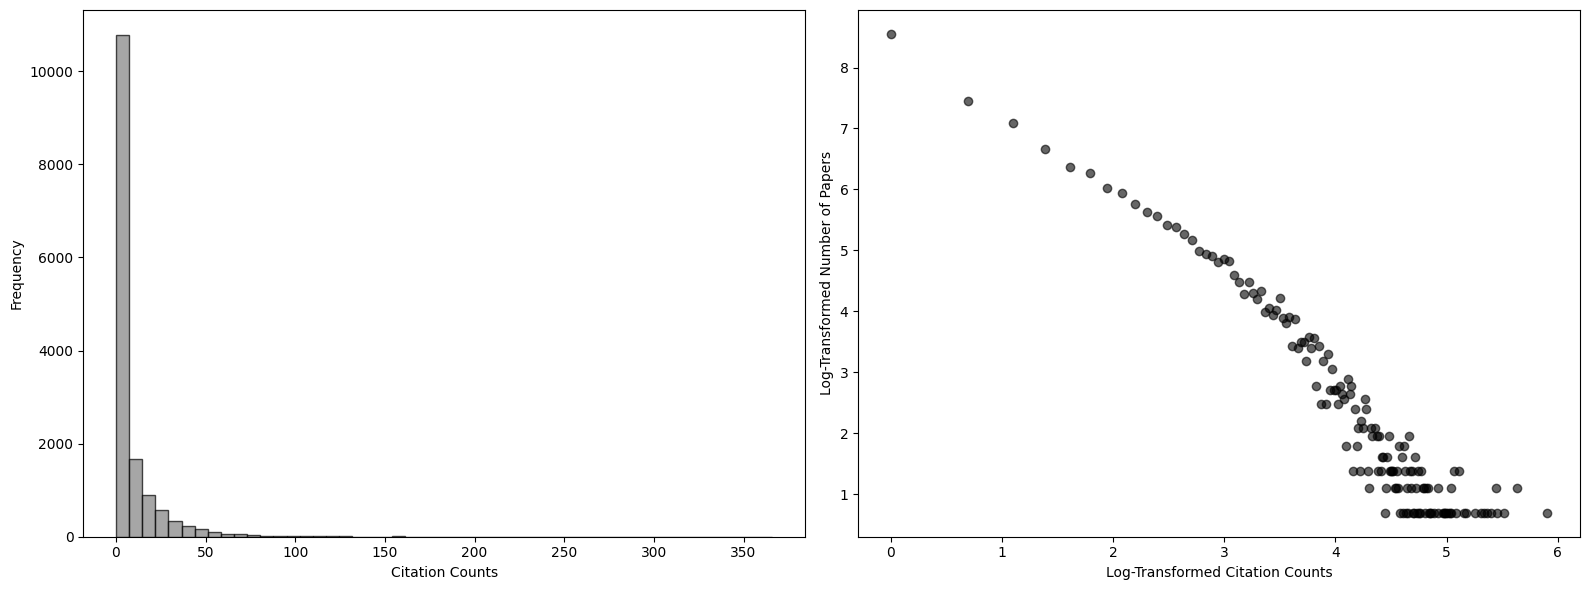

In [19]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

axes[0].hist(data['cited_by_count'], bins=50, alpha=0.7, color='gray', edgecolor='black')
axes[0].set_xlabel('Citation Counts')
axes[0].set_ylabel('Frequency')

log_cited_by_count = np.log1p(data['cited_by_count'])  # log(1 + x) to handle zeros
unique_counts = data['cited_by_count'].value_counts().sort_index()
log_x = np.log1p(unique_counts.index)
log_y = np.log1p(unique_counts.values)

axes[1].scatter(log_x, log_y, alpha=0.6, color='black')
axes[1].set_xlabel('Log-Transformed Citation Counts')
axes[1].set_ylabel('Log-Transformed Number of Papers')

plt.tight_layout()
# plt.savefig("citation_frequency.png", dpi=400)

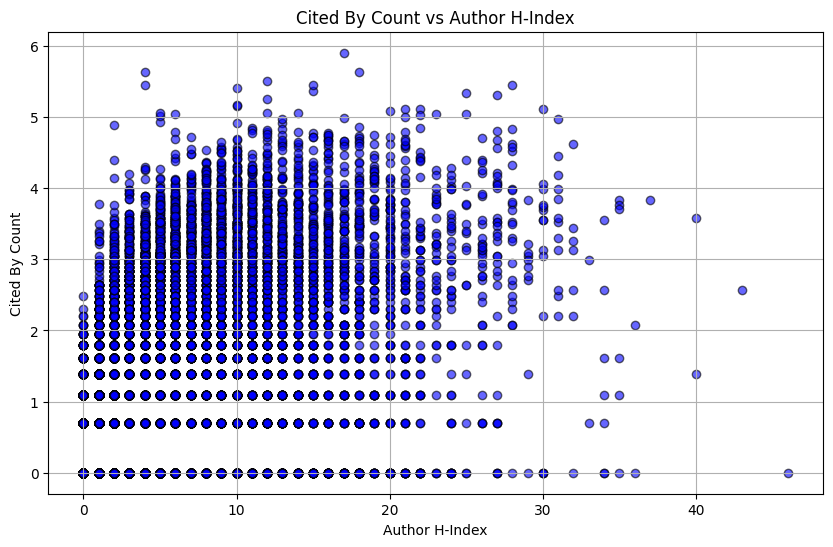

In [21]:
plt.figure(figsize=(10, 6))
plt.scatter(data['author_h_index'], np.log1p(data['cited_by_count']) , alpha=0.6, color='blue', edgecolor='black')
plt.title('Cited By Count vs Author H-Index')
plt.xlabel('Author H-Index')
plt.ylabel('Cited By Count')
plt.grid(True)
plt.show()